In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.4/496.4 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 25.0 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!yolo task = detect mode=train epochs=100 data=/content/drive/MyDrive/video_recognition/Dataset/data_custom.yaml   model= yolov8m.pt imgsz = 640 project= /content/drive/MyDrive/video_recognition/Resultados name= video_reg

100% 49.7M/49.7M [00:00<00:00, 54.5MB/s]
Ultralytics YOLOv8.0.50 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/video_recognition/Dataset/data_custom.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/video_recognition/Resultados, name=video_reg, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False

In [ ]:
import shutil

# Ruta de la carpeta de origen
ruta_origen = '/content/runs'

# Ruta de la carpeta de destino
ruta_destino = '/content/drive/MyDrive/video_recognition/D'

# Copiar la carpeta completa de origen a destino
shutil.copytree(ruta_origen, ruta_destino)


'/content/drive/MyDrive/video_recognition/D'

In [ ]:
!yolo task = detect mode=predict  model=/content/drive/MyDrive/video_recognition/Resultados/video_reg/weights/best.pt   conf=0.50  source=/content/drive/MyDrive/video_recognition/Dataset/val/images/ save= true

In [3]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('/content/drive/MyDrive/video_recognition/Resultados/video_reg/weights/best.pt')  # load a pretrained model (recommended for training)

# Use the model
#results = model.train(data='coco128.yaml', epochs=3)  # train the model
#results = model.val()  # evaluate model performance on the validation set
results = model('/content/drive/MyDrive/video_recognition/Dataset/val/images/frame_5580.jpg',
                line_thickness=3,
                save_crop = True,
                vid_stride = True,
                save_txt = True)  # predict on an image
#success = model.export(format='onnx')  # export the model to ONNX format


image 1/1 /content/drive/.shortcut-targets-by-id/1-3RTjreofC9zGwmF4N6SeTXADNXDr-tK/video_recognition/Dataset/val/images/frame_5580.jpg: 352x640 1 Pablo, 1 Leo, 1 Taty, 1 Karla, 1 Susi, 1 Pamela, 1 Marco, 1 Andres, 1 Mia, 1 Martin, 3379.7ms
Speed: 0.9ms preprocess, 3379.7ms inference, 17.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


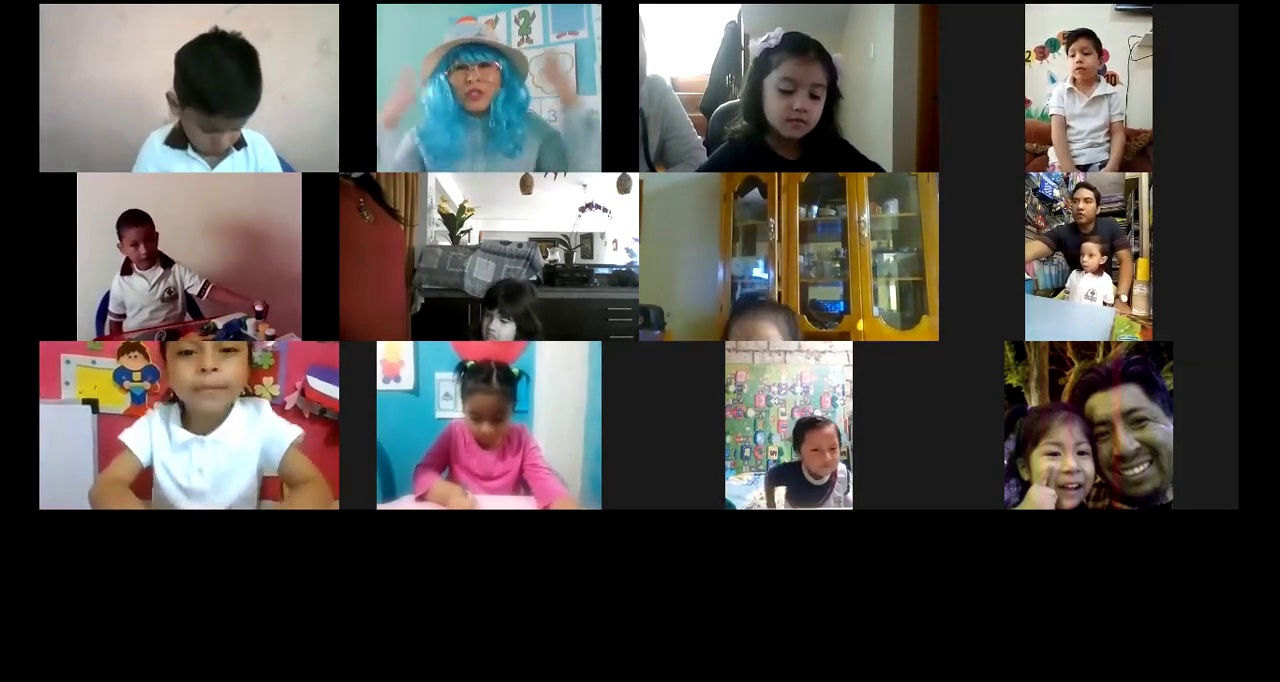

In [4]:
import cv2
res = results 

#res_plotted = res[0].plot()
for result in res:
    boxes = result.boxes
    names = result.names
    img_orig = result.orig_img
from google.colab.patches import cv2_imshow

cv2_imshow( img_orig)

In [75]:
boxes

ultralytics.yolo.engine.results.Boxes
type:  torch.Tensor
shape: torch.Size([10, 6])
dtype: torch.float32
tensor([[1.01500e+03, 4.14000e+02, 1.09300e+03, 4.99000e+02, 9.40267e-01, 9.00000e+00],
        [7.64000e+02, 6.80000e+01, 8.28000e+02, 1.32000e+02, 8.67338e-01, 6.00000e+00],
        [7.90000e+02, 4.21000e+02, 8.39000e+02, 4.78000e+02, 8.45527e-01, 1.00000e+01],
        [4.80000e+02, 2.95000e+02, 5.21000e+02, 3.40000e+02, 7.85202e-01, 4.00000e+00],
        [1.23000e+02, 2.13000e+02, 1.60000e+02, 2.71000e+02, 7.58449e-01, 1.00000e+00],
        [1.63000e+02, 3.42000e+02, 2.50000e+02, 4.23000e+02, 7.31095e-01, 2.00000e+00],
        [4.59000e+02, 3.72000e+02, 5.14000e+02, 4.37000e+02, 7.21694e-01, 3.00000e+00],
        [1.07600e+03, 2.41000e+02, 1.10500e+03, 2.68000e+02, 6.81655e-01, 8.00000e+00],
        [1.06700e+03, 3.70000e+01, 1.10000e+03, 8.10000e+01, 6.69929e-01, 7.00000e+00],
        [1.73000e+02, 9.90000e+01, 2.49000e+02, 1.59000e+02, 6.59730e-01, 0.00000e+00]], device='cuda:

In [21]:
import cv2

#import cv2

import cv2
import os

def reducir_fps_video(video_path, fps_deseada, video_reducido_path):
    # Abre el archivo de video para leer
    cap = cv2.VideoCapture(video_path)

    # Obtiene la información de los fotogramas por segundo del video original
    fps_actual = cap.get(cv2.CAP_PROP_FPS)

    # Calcula la relación de reducción de los fotogramas
    reduccion = round(fps_actual / fps_deseada)

    # Crea un objeto VideoWriter para escribir el video reducido en un archivo
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video_reducido_path, fourcc, fps_deseada, (int(cap.get(3)), int(cap.get(4))))

    # Lee cada fotograma del archivo de video y escribe solo los que deseas en el archivo de video reducido
    contador_fotograma = 0
    while True:
        # Lee un fotograma del archivo de video
        ret, fotograma = cap.read()

        # Si no se pudo leer un fotograma, se ha llegado al final del archivo de video
        if not ret:
            break

        # Si este es el fotograma que deseas escribir, escríbelo en el archivo de video reducido
        if contador_fotograma % reduccion == 0:
            out.write(fotograma)

        # Incrementa el contador de fotogramas
        contador_fotograma += 1

    # Libera los objetos VideoCapture y VideoWriter y cierra el archivo de video reducido
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    # Verifica si el archivo de video reducido se ha creado correctamente y es legible
    try:
        prueba = cv2.VideoCapture(video_reducido_path)
        assert prueba.isOpened()
        prueba.release()
    except AssertionError:
        os.remove(video_reducido_path)
        raise Exception("Error al crear el archivo de video reducido")




In [24]:
# Especifica la ruta del archivo de video original
video_path = "/content/corte.mp4"

# Especifica la tasa de fotogramas deseada para el video reducido
fps_deseada = 0.033

# Especifica la ruta donde se guardará el archivo de video reducido
video_reducido_path = "ruta_del_archivo_video_reducido.mp4"

# Reduce la tasa de fps del video y guarda el video reducido en un nuevo archivo
reducir_fps_video(video_path, fps_deseada, video_reducido_path)


In [28]:
model = YOLO('/content/drive/MyDrive/video_recognition/Resultados/video_reg/weights/best.pt')  # load a pretrained model (recommended for training)

# Use the model
#results = model.train(data='coco128.yaml', epochs=3)  # train the model
#results = model.val()  # evaluate model performance on the validation set




results = model('/content/ruta_del_archivo_video_reducido.mp4',
                line_thickness=3,
                save_crop = True,
                vid_stride = True,
                save_txt =False,
                save = True,
                ) 


video 1/1 (1/3) /content/ruta_del_archivo_video_reducido.mp4: 352x640 1 Leo, 1 Taty, 2 Karlas, 2 Karens, 1 Andres, 1 Martin, 761.9ms
video 1/1 (2/3) /content/ruta_del_archivo_video_reducido.mp4: 352x640 1 Pablo, 1 Leo, 1 Taty, 1 Karla, 1 Susi, 2 Karens, 1 Pamela, 1 Andres, 2 Martins, 750.8ms
video 1/1 (3/3) /content/ruta_del_archivo_video_reducido.mp4: 352x640 1 Leo, 2 Karlas, 1 Susi, 1 Karen, 1 Pamela, 1 Martin, 722.8ms
Speed: 0.9ms preprocess, 745.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


In [ ]:
!pip install deepface

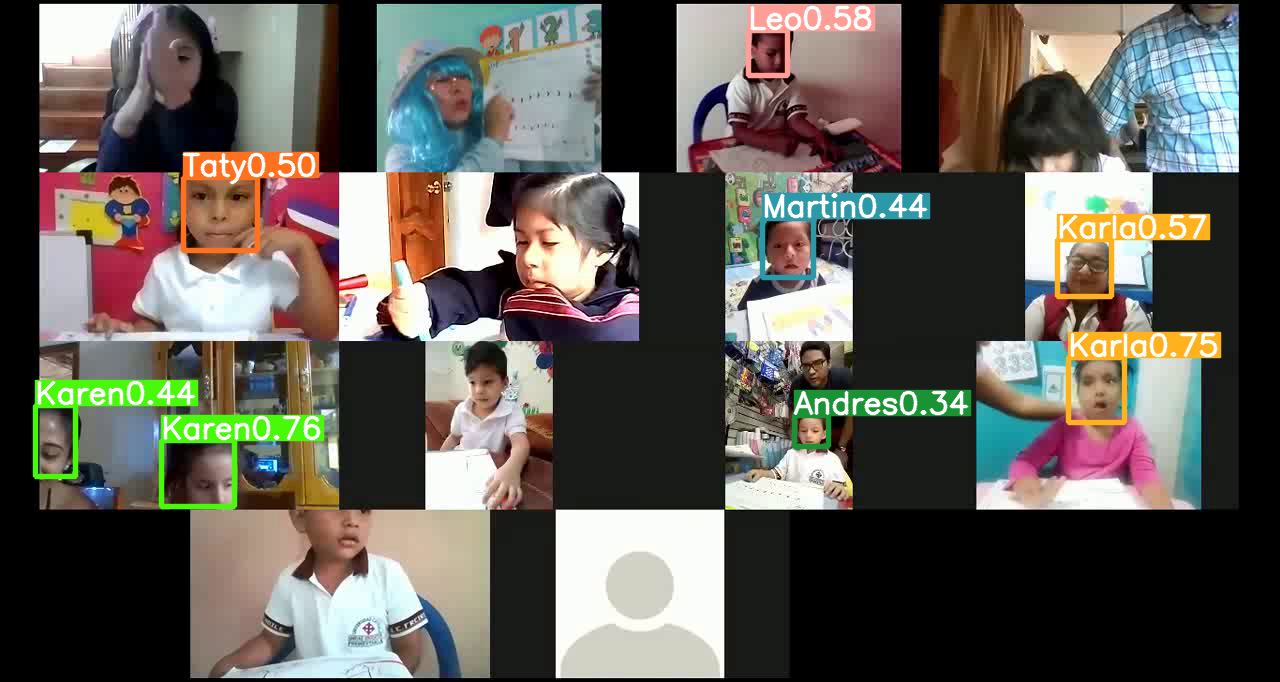

In [27]:
import cv2
res = results 

#res_plotted = res[0].plot()
for result in res:
    boxes = result.boxes
    names = result.names
    img_orig = result.orig_img
from google.colab.patches import cv2_imshow
I = res[0].plot(show_conf=True, line_width= 1 , font_size=30, font='Arial.ttf', pil=False, example='abc')
cv2_imshow(res[0].plot(show_conf=True, line_width=None, font_size=None, font='Arial.ttf', pil=False, example='abc'))

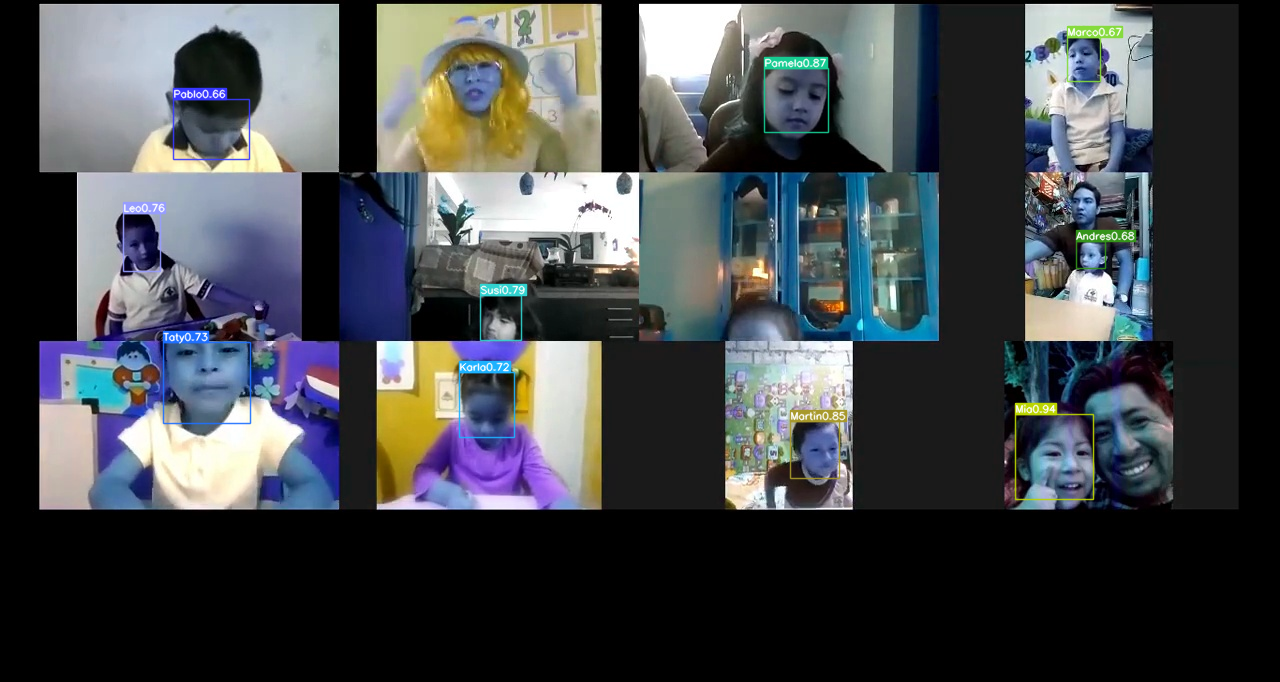

In [109]:
from PIL import Image

img = Image.fromarray(np.uint8(I))

# Muestra la imagen utilizando el visor predeterminado del sistema operativo
img.show()

In [45]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n-cls.yaml")  # build a new model from scratch
model = YOLO("yolov8n-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
#model.train(data='/content/drive/MyDrive/video_recognition/D_C/images.zip', epochs=100, imgsz=64)